# Classing Art Styles

This is a fun data set to test to train a model can learn different art styles!

Please note the following commands were run on an instance through google. The pip install torch_nightly will not install on my mac.

In [ ]:
!pip install --upgrade pip
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install fastai --upgrade

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import warnings; warnings.simplefilter('ignore')  
# will throw warning: "Palette images with Transparency expressed in bytes should be converted to RGBA images"

In [5]:
from fastai import *
from fastai.vision import *

Testing Data

In [6]:
path = Path('artstyles')
classes = ['splatter_paint', 'abstractexpressionisum']

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

splatter_paint


abstractexpressionisum


In [8]:
np.random.seed(42)
path = Path('artstyles')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

#padding_mode = 'zeros', or padding_mode = 'border', will make data NoneType

In [9]:
type(data)

fastai.vision.data.ImageDataBunch

In [10]:
data.classes

['abstractexpressionisum', 'splatter_paint']

In [11]:
data.c # number of classes

2

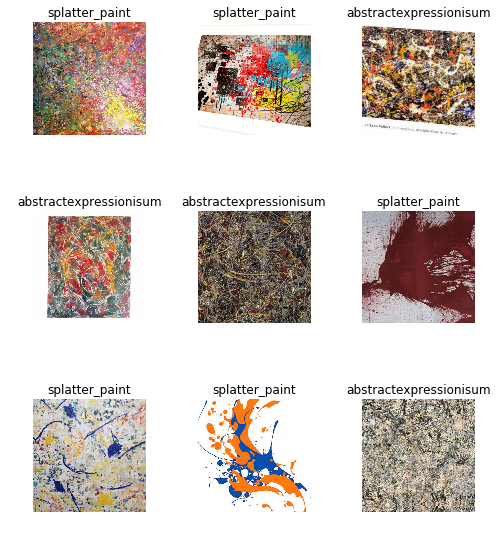

In [10]:
data.show_batch(rows=3, figsize=(7,8))

**Train a Model**

In [12]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [13]:
learn.fit_one_cycle(3)

Total time: 00:37
epoch  train_loss  valid_loss  accuracy
1      0.819928    0.412464    0.811475  (00:12)
2      0.640209    0.400026    0.844262  (00:12)
3      0.518779    0.392156    0.852459  (00:12)



In [14]:
learn.save('stage-1')

In [20]:
learn.unfreeze()

In [33]:
#learn.lr_find()

In [ ]:
#learn.recorder.plot()

In [18]:
#learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

In [18]:
learn.save('stage-2')

**Interpreation**

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

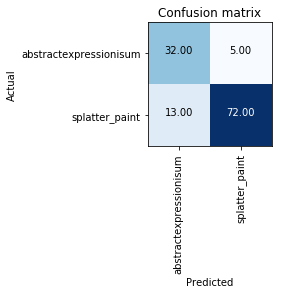

In [16]:
interp.plot_confusion_matrix()

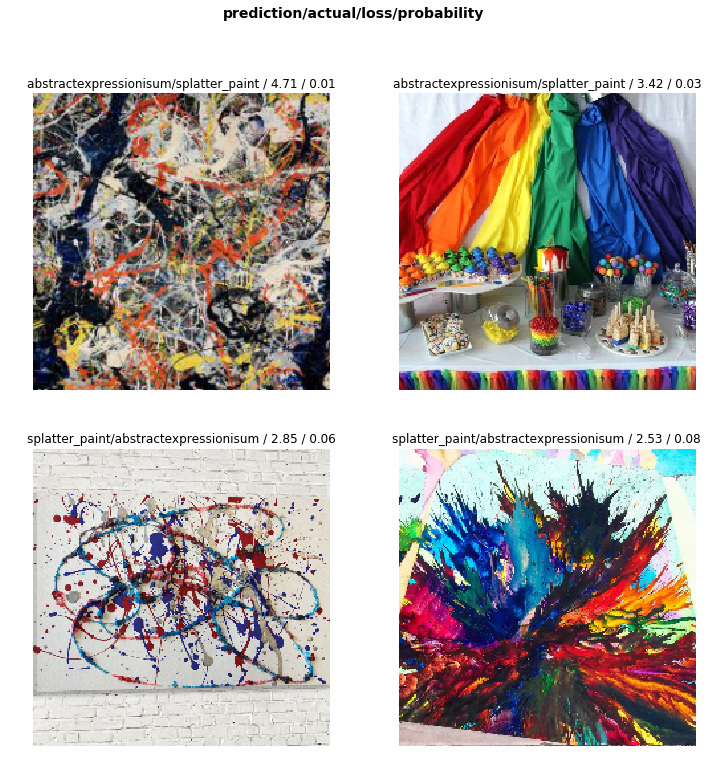

In [17]:
interp.plot_top_losses(4)